# Regressão Linear Simples

## Base plano de saude

O objetivo é prever o valor do plano de saude

In [1]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
base_plano_saude = pd.read_csv('plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [3]:
X = base_plano_saude.iloc[:, 0].values
X

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [4]:
Y = base_plano_saude.iloc[:, 1].values
Y

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090],
      dtype=int64)

#### Coeficiente de relassão

In [5]:
np.corrcoef(X, Y)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [6]:
X.shape

(10,)

In [7]:
X = X.reshape(-1, 1)
X.shape

(10, 1)

In [8]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X, Y)

LinearRegression()

In [9]:
# b0
regressor_plano_saude.intercept_

-558.9490909090912

In [10]:
# b1
regressor_plano_saude.coef_

array([61.86787879])

In [11]:
previsoes = regressor_plano_saude.predict(X)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [12]:
grafico = px.scatter(x= X.ravel(), y= Y)
grafico.add_scatter(x= X.ravel(), y= previsoes, name= "Regressão")
grafico.show()

In [13]:
regressor_plano_saude.score(X, Y)

0.8666112727879174

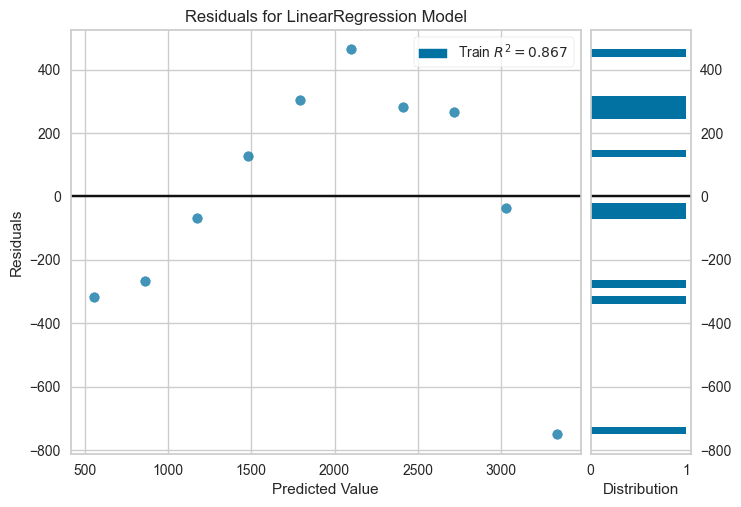

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
from yellowbrick.regressor import ResidualsPlot
visualisador = ResidualsPlot(regressor_plano_saude)
visualisador.fit(X, Y)
visualisador.poof() 

# Regressão Polinomial

In [15]:
import pandas as pd

In [16]:
base_plano_saude = pd.read_csv('plano_saude2.csv')
base_plano_saude

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [17]:
X = base_plano_saude.iloc[:, 0:1].values
Y = base_plano_saude.iloc[:, 1].values

In [18]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [19]:
Y

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

In [21]:
X_poly.shape

(10, 5)

In [22]:
X_poly

array([[1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05],
       [1.0000000e+00, 2.3000000e+01, 5.2900000e+02, 1.2167000e+04,
        2.7984100e+05],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04,
        6.1465600e+05],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03, 3.5937000e+04,
        1.1859210e+06],
       [1.0000000e+00, 3.8000000e+01, 1.4440000e+03, 5.4872000e+04,
        2.0851360e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 4.8000000e+01, 2.3040000e+03, 1.1059200e+05,
        5.3084160e+06],
       [1.0000000e+00, 5.3000000e+01, 2.8090000e+03, 1.4887700e+05,
        7.8904810e+06],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07]])

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor_polinomial = LinearRegression()
regressor_polinomial.fit(X_poly, Y)

LinearRegression()

In [25]:
regressor_polinomial.intercept_

16561.974637941225

In [26]:
regressor_polinomial.coef_

array([ 0.00000000e+00, -2.12242253e+03,  9.90404199e+01, -1.95058276e+00,
        1.40792541e-02])

In [27]:
novo = [[40]]
novo = poly.transform(novo)
novo

array([[1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04, 2.56e+06]])

In [28]:
regressor_polinomial.predict(novo)

array([1335.33958016])

In [29]:
previsoes = regressor_polinomial.predict(X_poly)
previsoes

array([ 549.65035466,  345.85081577,  616.53845994,  975.83915951,
       1249.06759854, 1472.72727271, 1894.51048941, 2973.29836768,
       5379.16083826, 9993.35664352])

In [30]:
import plotly.express as px
grafico = px.scatter(x= X[:, 0], y= Y)
grafico.add_scatter(x = X[:, 0], y= previsoes, name="Regressão")
grafico.show()

# Arvore de decisão

In [31]:
base_plano_saude = pd.read_csv('plano_saude2.csv')
base_plano_saude

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [32]:
X = base_plano_saude.iloc[:, 0:1].values
Y = base_plano_saude.iloc[:, 1].values

In [33]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [34]:
Y

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [35]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore = DecisionTreeRegressor()
regressor_arvore.fit(X, Y)

DecisionTreeRegressor()

In [36]:
previsoes = regressor_arvore.predict(X)
previsoes

array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

In [37]:
regressor_arvore.score(X, Y)

1.0

In [38]:
import plotly.express as px
grafico = px.scatter(x= X.ravel(), y= Y)
grafico.add_scatter(x = X.ravel(), y= previsoes, name="Regressão")
grafico.show()

In [39]:
X_teste = np.arange(min(X), max(X), 0.1)
X_teste

C:\Users\andre\AppData\Local\Temp\ipykernel_19948\2299448528.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



array([18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2,
       21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,
       25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7,
       26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. ,
       30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2,
       32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33

In [40]:
X_teste.shape

(450,)

In [41]:
X_teste = X_teste.reshape(-1, 1)
X_teste.shape

(450, 1)

In [42]:
grafico = px.scatter(x= X.ravel(), y= Y)
grafico.add_scatter(x = X_teste.ravel(), y= regressor_arvore.predict(X_teste), name="Regressão")
grafico.show()

In [43]:
regressor_arvore.predict([[40]])

array([1150.])

# Regressão Random Forest

In [44]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [45]:
Y

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators=10)
regressor_forest.fit(X, Y)

RandomForestRegressor(n_estimators=10)

In [47]:
regressor_forest.score(X, Y)

0.9356761800987968

In [48]:
X_teste

array([[18. ],
       [18.1],
       [18.2],
       [18.3],
       [18.4],
       [18.5],
       [18.6],
       [18.7],
       [18.8],
       [18.9],
       [19. ],
       [19.1],
       [19.2],
       [19.3],
       [19.4],
       [19.5],
       [19.6],
       [19.7],
       [19.8],
       [19.9],
       [20. ],
       [20.1],
       [20.2],
       [20.3],
       [20.4],
       [20.5],
       [20.6],
       [20.7],
       [20.8],
       [20.9],
       [21. ],
       [21.1],
       [21.2],
       [21.3],
       [21.4],
       [21.5],
       [21.6],
       [21.7],
       [21.8],
       [21.9],
       [22. ],
       [22.1],
       [22.2],
       [22.3],
       [22.4],
       [22.5],
       [22.6],
       [22.7],
       [22.8],
       [22.9],
       [23. ],
       [23.1],
       [23.2],
       [23.3],
       [23.4],
       [23.5],
       [23.6],
       [23.7],
       [23.8],
       [23.9],
       [24. ],
       [24.1],
       [24.2],
       [24.3],
       [24.4],
       [24.5],
       [24

In [49]:
grafico = px.scatter(x= X.ravel(), y= Y)
grafico.add_scatter(x = X_teste.ravel(), y= regressor_forest.predict(X_teste), name="Regressão")
grafico.show()

In [50]:
regressor_forest.predict([[40]])

array([1264.])

# SRV (Support Vector Regression)

In [51]:
# Normalizar valores

In [52]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [53]:
Y

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_scaler = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
Y_scaler = scaler_y.fit_transform(Y.reshape(-1,1))

In [55]:
X_scaler

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [56]:
Y_scaler

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [57]:
# Kernel linear
from sklearn.svm import SVR
regressor_svr = SVR(kernel='linear')
regressor_svr.fit(X, Y)

SVR(kernel='linear')

In [58]:
grafico = px.scatter(x= X.ravel(), y= Y)
grafico.add_scatter(x = X_teste.ravel(), y= regressor_svr.predict(X_teste), name="Regressão")
grafico.show()

In [59]:
#  Kernel polinomial
regressor_svr = SVR(kernel='poly', degree=3)
regressor_svr.fit(X, Y)

SVR(kernel='poly')

In [60]:
grafico = px.scatter(x= X.ravel(), y= Y)
grafico.add_scatter(x = X_teste.ravel(), y= regressor_svr.predict(X_teste), name="Regressão")
grafico.show()

In [61]:
# Kernel rbf
regressor_svr = SVR(kernel='rbf')
regressor_svr.fit(X_scaler, Y_scaler.ravel())

SVR()

In [62]:
grafico = px.scatter(x= X_scaler.ravel(), y= Y_scaler.ravel())
grafico.add_scatter(x = X_scaler.ravel(), y= regressor_svr.predict(X_scaler), name="Regressão")
grafico.show()

In [63]:
novo = [[40]]
novo = scaler_x.transform(novo)
novo

array([[-0.03481553]])

In [64]:
previsao = regressor_svr.predict(novo)

In [65]:
scaler_y.inverse_transform(previsao.reshape(1, -1))

array([[1333.85650748]])

# Rede Neural

In [66]:
X_scaler

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [67]:
Y_scaler

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [70]:
from sklearn.neural_network import MLPRegressor
regressor_rna = MLPRegressor(max_iter=1000)
regressor_rna.fit(X_scaler, Y_scaler.ravel())

MLPRegressor(max_iter=1000)

In [71]:
regressor_rna.score(X_scaler, Y_scaler)

0.9579778119862383

In [72]:
grafico = px.scatter(x= X_scaler.ravel(), y= Y_scaler.ravel())
grafico.add_scatter(x = X_scaler.ravel(), y= regressor_rna.predict(X_scaler), name="Regressão")
grafico.show()

In [73]:
novo = [[40]]
novo = scaler_x.transform(novo)
novo

array([[-0.03481553]])

In [75]:
scaler_y.inverse_transform(regressor_rna.predict(novo).reshape(-1,1))

array([[1045.74006592]])